In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

# Input data files are available in the "../input/" directory.
from subprocess import check_output
input_folder = "../imdb_data"
print(check_output(["ls", input_folder]).decode("utf8"))

imdb-5000-movie-dataset.zip
movie_metadata_clean.csv
movie_metadata.csv



In [2]:
# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [3]:
### Read data

f = pd.read_csv(input_folder+"/movie_metadata_clean.csv")
data=DataFrame(f)
data.head(10)

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_millions,gross_log
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,760.505847,20.449494
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,309.404152,19.550159
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,200.074175,19.114199
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,448.130642,19.920595
4,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,73.058679,18.106773
5,6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,...,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,336.530303,19.634199
6,7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,...,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,200.807262,19.117856
7,8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,...,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,458.991599,19.944542
8,9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,...,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,301.956980,19.525795
9,10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,...,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,330.249062,19.615358


In [4]:
### Create a filter for numerical features
### Choose predictors

# Create an index for only numerical features
index_filter_num_all=data.dtypes[data.dtypes!='object'].index
print("Numerical features:")
print(index_filter_num_all)

# This filter is used in the next steps for choosing the input features
predictors_name = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes']  # Remove target variables
print("Predictors:")
print(predictors_name)


# The target feature can be ONE of the following: 
targets_names = ['gross', 'gross_millions', 'gross_log']
print("Targets:")
print(targets_names)

# A list with preditors and targets: 
all_num_names = predictors_name + targets_names
print("All:")
print(all_num_names)



Numerical features:
Index(['Unnamed: 0', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'gross_millions', 'gross_log'],
      dtype='object')
Predictors:
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
Targets:
['gross', 'gross_millions', 'gross_log']
All:
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users', 'cast_total_fac

In [18]:
### Define inputs, target, and training and test data 
### Simple data split for training and testing
### 80% train
### 20% test

#X=StandardScaler().fit_transform(data_2[predictors_name])
#y=np.array(data_2['gross'])
X=data[predictors_name]
y=data['gross_millions']

number_of_samples = len(y)
print("Total: {}".format(number_of_samples))

np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.80)
X_train = X.values[random_indices[:num_training_samples]]
y_train = y.values[random_indices[:num_training_samples]]
X_test  = X.values[random_indices[num_training_samples:]]
y_test  = y.values[random_indices[num_training_samples:]]

print("Train: {}".format(len(y_train)))
print("Test:  {}".format(len(y_test)))

Total: 3756
Train: 3004
Test:  752


In [19]:
### Double-check there is not Null data

print(np.sum(np.isnan(X_train.shape)))
print(np.sum(np.isnan(y_train.shape)))
print(np.sum(np.isnan(X_test.shape)))
print(np.sum(np.isnan(y_test.shape)))

0
0
0
0


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

(19952.623149688789,
 0.0050118723362727246,
 -7.5866098594840308,
 0.49240016390758279)

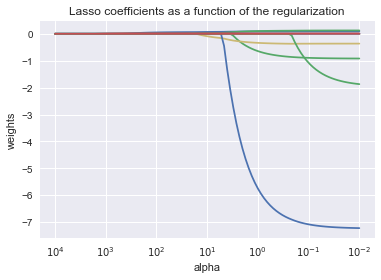

In [20]:
### Lasso Regression
from sklearn import metrics
from sklearn import linear_model


### Plot coefficients as a function of the regularization
# Compute paths

n_alphas = 100
alphas = np.logspace(-2, 4, n_alphas)
clf = linear_model.Lasso(max_iter=1E3)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

#Display results

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
#plt.show()

In [21]:
# Tune alpha parameter
modelCv = linear_model.RidgeCV(alphas=alphas)
modelCv.fit(X_train,y_train)
modelCv.alpha_

100.0

Metrics
MAE: 32.33297053014586
R2:  0.4702244986065831


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


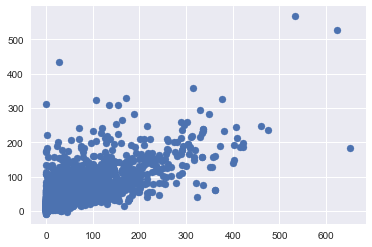

In [45]:
### Lasso Regression

#model=linear_model.Lasso(alpha=0.3, normalize=True, max_iter=1e5)
model=linear_model.Lasso(alpha=0.3)

model.fit(X_train,y_train)

y_train_prediction=model.predict(X_train)

plt.scatter(y_train, y_train_prediction)

#Some metrics
accuracy = metrics.mean_absolute_error(y_train, y_train_prediction)
r2 = metrics.r2_score(y_train, y_train_prediction)
print("Metrics")
print("MAE: {}".format(accuracy))
print("R2:  {}".format(r2))

In [38]:
model.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00016376,  0.        , -0.        ,  0.00332591,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

(0.0001, 0.31622776601683794)

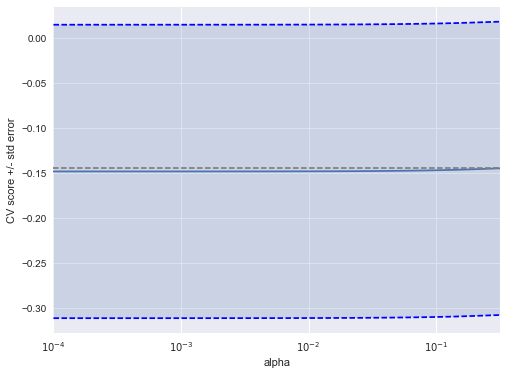

In [40]:
### Cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lasso = linear_model.Lasso(random_state=0)

alphas = np.logspace(-4, -0.5, 30)
scores = list()
scores_std = list()
n_folds = 10

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, X, y, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [52]:
### Cross-validation (2nd round)
from sklearn.model_selection import cross_val_score

lasso = linear_model.Lasso(alpha=0.1, normalize=False, max_iter=1e5)
scores = cross_val_score(lasso, X, y, cv=10)
scores.mean()

-0.14618060139900813